In [ ]:
import torch
w=torch.tensor(1.0,requires_grad=True)
a = w*2
y = a**2
y.backward()
print(w.grad)

tensor(8.)


In [ ]:
#Aotograd

In [ ]:
import numpy as np
x=np.array([[1,2,3],
            [1,2,3],
            [1,2,3]])
x.size
x.reshape(3,3,-1)


array([[[1],
        [2],
        [3]],

       [[1],
        [2],
        [3]],

       [[1],
        [2],
        [3]]])

In [ ]:
x=torch.tensor([[1,2,3],
            [1,2,3],
            [1,2,3]])
x.size()
x.shape
x

tensor([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]])

In [ ]:
x=torch.unsqueeze(x,2)
x

tensor([[[1],
         [2],
         [3]],

        [[1],
         [2],
         [3]],

        [[1],
         [2],
         [3]]])

In [ ]:
x=torch.squeeze(x)
x

tensor([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]])

In [ ]:
x=torch.unsqueeze(x,0)

In [ ]:
x

tensor([[[1, 2, 3],
         [1, 2, 3],
         [1, 2, 3]]])

In [ ]:
x.view(9)

tensor([1, 2, 3, 1, 2, 3, 1, 2, 3])

In [ ]:
#y=wx+b
x=torch.tensor([[1.,2.],[3.,4.],[5.,6.]])
w=torch.randn(5,3,dtype=torch.float)
b=torch.randn(5,2,dtype=torch.float)

In [ ]:
w@x+b

tensor([[  1.1259,   2.2578],
        [-16.4264, -18.4923],
        [  4.3955,   5.3937],
        [ -1.1222,  -7.4126],
        [ -4.4465,  -6.9997]])

In [ ]:
wx=torch.mm(w,x)
wx+b

tensor([[  1.1259,   2.2578],
        [-16.4264, -18.4923],
        [  4.3955,   5.3937],
        [ -1.1222,  -7.4126],
        [ -4.4465,  -6.9997]])

In [ ]:
w.size(),x.size()

(torch.Size([5, 3]), torch.Size([3, 2]))

In [ ]:
x+2

tensor([[3., 4.],
        [5., 6.],
        [7., 8.]])

In [ ]:
import pickle
import matplotlib.pyplot as plt

In [ ]:
bk_img=torch.FloatTensor(pickle.load(open('broken_image_t.p','rb'),encoding='latin1'))

In [ ]:
bk_img.shape

torch.Size([10000])

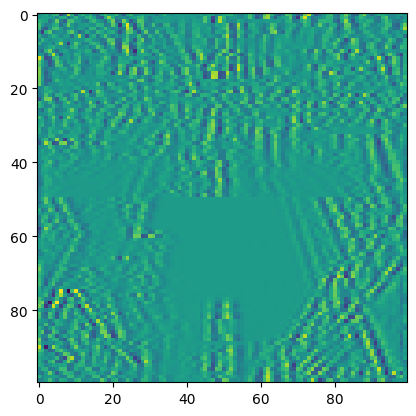

In [ ]:
plt.imshow(bk_img.view((100,100)))

In [ ]:
def wxb(x,n=5):
  h=x
  filt=torch.tensor([-1./3,1./3,-1./3])
  for i in range(n):
    z_t=torch.tensor([1.0*0])
    h_l=torch.cat((z_t,h[:-1]),0)
    h_r=torch.cat((h[1:],z_t),0)
    h = filt[0]*h + filt[2]*h_l + filt[1]*h_r
    if i%2==0:
      h = torch.cat((h[h.shape[0]//2:],h[:h.shape[0]//2]),0)
  return h

In [ ]:
def loss_f(h,x):
  return torch.dist(h,x)

In [ ]:
r_t=torch.randn(10000,dtype=torch.float)

In [ ]:
r_t.requires_grad_(True)

tensor([ 0.2967, -0.0323,  0.6908,  ..., -0.5489, -0.4406,  0.4892],
       requires_grad=True)

In [ ]:
#wn=wold-lr*grad

In [ ]:
l_r=0.8
for i in range(0,20000):
  r_t.requires_grad_(True)
  h = wxb(r_t)
  loss = loss_f(h,bk_img)
  loss.backward()
  with torch.no_grad():
    r_t = r_t - l_r*r_t.grad
  if i %1000==0:
    print(f"loss{i},{loss.item()}")


loss0,12.237281799316406
loss1000,1.147391438484192
loss2000,0.5568352937698364
loss3000,0.386522501707077
loss4000,0.3053096830844879
loss5000,0.25585031509399414
loss6000,0.22070136666297913
loss7000,0.19302479922771454
loss8000,0.16967685520648956
loss9000,0.14904049038887024
loss10000,0.13020704686641693
loss11000,0.11263146996498108
loss12000,0.0959693193435669
loss13000,0.07999350875616074
loss14000,0.0645488053560257
loss15000,0.04952624440193176
loss16000,0.03484869748353958
loss17000,0.020464112982153893
loss18000,0.0211642999202013
loss19000,0.02116730809211731


In [ ]:
r_t.shape

torch.Size([10000])

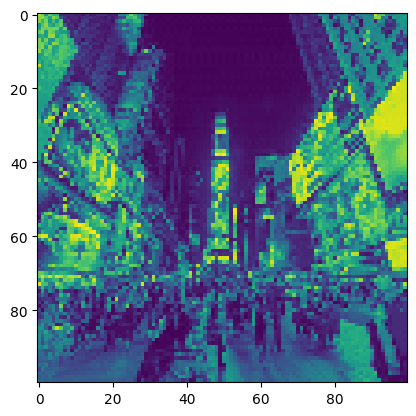

In [ ]:
plt.imshow(r_t.view(100,100).data)

In [ ]:
from torchvision import datasets, transforms, utils
from torch.utils import data

import numpy as np

In [ ]:
tr=transforms.Compose([transforms.ToTensor()])

In [ ]:
tr_data=datasets.FashionMNIST(root='./.data/',train=True,download=True,transform=tr)
tt_data=datasets.FashionMNIST(root='./.data/',train=False,download=True,transform=tr)

100%|██████████| 26421880/26421880 [00:00<00:00, 119193808.47it/s]


Extracting ./.data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./.data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 6895882.50it/s]

Extracting ./.data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./.data/FashionMNIST/raw




100%|██████████| 4422102/4422102 [00:00<00:00, 62641688.22it/s]


Extracting ./.data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./.data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6256817.44it/s]

Extracting ./.data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./.data/FashionMNIST/raw



In [ ]:
tr_l=data.DataLoader(tr_data,16)
tt_l=data.DataLoader(tt_data,16)

In [ ]:
data1=iter(tr_l)
xs,ys=next(data1)

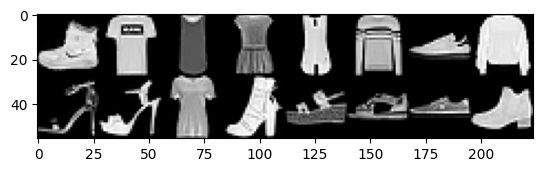

In [ ]:
img=utils.make_grid(xs,padding=0)
npimg=img.numpy()
plt.imshow(np.transpose(npimg,(1,2,0)))

In [ ]:
ys

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9])

인공신경망을 이용한 분류기 설계

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from torchvision import datasets, transforms

환경 설정

In [ ]:
USE_CUDA=torch.cuda.is_available()
DEVICE=torch.device('cuda' if USE_CUDA else 'cpu')

데이터 수집

데이터 전처리

In [ ]:
batch_size=64
tr_data=datasets.FashionMNIST(root='./.data/',train=True,download=True,transform=tr)
tt_data=datasets.FashionMNIST(root='./.data/',train=False,download=True,transform=tr)
tr_l=data.DataLoader(tr_data,batch_size)
tt_l=data.DataLoader(tt_data,batch_size)

In [ ]:
data1=iter(tr_l)
xs,ys=next(data1)

In [ ]:
xs.shape

torch.Size([64, 1, 28, 28])

모델생성

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.fc1 = nn.Linear(784,256)
    self.fc2 = nn.Linear(256,128)
    self.fc3 = nn.Linear(128,10)

  def forward(self,x):
    x =  x.view(-1,28*28)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [ ]:
m = Net().to(DEVICE)
optimizer = optim.SGD(m.parameters(),lr=0.01)

학습 준비

In [ ]:
def train(m,tr_data,op):
  m.train()
  for b_idx,(x,y) in enumerate(tr_data):
    x,ty = x.to(DEVICE),y.to(DEVICE)
    optimizer.zero_grad()
    py=m(x)
    loss = F.cross_entropy(py,ty)
    loss.backward()
    optimizer.step()

In [ ]:
def evaluate(m,tt_data):
  m.eval()
  test_loss=0
  correct=0
  with torch.no_grad():
    for tx,ty in tt_data:
      x,ty = tx.to(DEVICE),ty.to(DEVICE)
      py=m(x)
      test_loss += F.cross_entropy(py,ty,reduction='sum').item()

      pr=py.max(1,keepdim=True)[1]
      correct += pr.eq(ty.view_as(pr)).sum().item()

  test_loss /= len(tt_data.dataset)
  test_acc = 100.* correct / len(tt_data.dataset)
  return test_loss , test_acc

학습

In [ ]:
for ep in range(1,31):
  train(m,tr_l,optimizer)
  tt_loss,tt_acc = evaluate(m,tt_l)
  print(f'[{ep}] loss:{tt_loss},acc:{tt_acc}')

[1] loss:0.842362956905365,acc:69.03
[2] loss:0.6630811341762542,acc:77.29
[3] loss:0.5890982627391815,acc:79.58
[4] loss:0.5564572900772095,acc:80.13
[5] loss:0.5366376606941223,acc:80.71
[6] loss:0.5203139481544494,acc:81.24
[7] loss:0.5075439386844635,acc:81.8
[8] loss:0.49749300394058227,acc:82.03
[9] loss:0.4875568970680237,acc:82.41
[10] loss:0.47869332623481753,acc:82.82
[11] loss:0.47008655400276184,acc:83.2
[12] loss:0.46107965965270997,acc:83.43
[13] loss:0.4537327693939209,acc:83.68
[14] loss:0.44612135624885557,acc:83.95
[15] loss:0.43831985988616945,acc:84.39
[16] loss:0.43226230220794676,acc:84.71
[17] loss:0.42596791186332705,acc:84.92
[18] loss:0.42011320180892947,acc:85.15
[19] loss:0.41531747703552246,acc:85.22
[20] loss:0.41147399725914,acc:85.24
[21] loss:0.40740139222145083,acc:85.5
[22] loss:0.40334112033843994,acc:85.64
[23] loss:0.3999850933790207,acc:85.81
[24] loss:0.3970702589035034,acc:85.84
[25] loss:0.3925929767370224,acc:85.96
[26] loss:0.3897770308732986

데이터 정리(일부러 데이터 변환)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from torchvision import datasets, transforms

환경 설정

In [ ]:
USE_CUDA=torch.cuda.is_available()
DEVICE=torch.device('cuda' if USE_CUDA else 'cpu')

데이터 수집 및 변환

In [ ]:
transforms.ToTensor#이미지 텐서화
transforms.Resize#이미지 크기 변환
transforms.RandomHorizontalFlip#이미지 회전 변환

torchvision.transforms.transforms.RandomHorizontalFlip

In [ ]:
batch_size=64
tr_data=datasets.FashionMNIST(root='./.data/',train=True,download=True,transform=
                              transforms.Compose([
                                  transforms.RandomHorizontalFlip(),
                                  transforms.ToTensor(),
                                  transforms.Normalize((0.1307,),(0.30801,))
                              ]))
tt_data=datasets.FashionMNIST(root='./.data/',train=False,download=True,transform=
                              transforms.Compose([
                                  transforms.RandomHorizontalFlip(),
                                  transforms.ToTensor(),
                                  transforms.Normalize((0.1307,),(0.30801,))
                              ]))
tr_l=data.DataLoader(tr_data,batch_size,shuffle=True)
tt_l=data.DataLoader(tt_data,batch_size,shuffle=True)

In [ ]:
tr_l,tt_l

(<torch.utils.data.dataloader.DataLoader at 0x7e31caa9abc0>,
 <torch.utils.data.dataloader.DataLoader at 0x7e31caa9b3a0>)

모델

In [ ]:
class Net(nn.Module):
  def __init__(self,dr_n=0.2):
    super(Net,self).__init__()
    self.fc1=nn.Linear(784,256)
    self.fc2=nn.Linear(256,128)
    self.fc3=nn.Linear(128,10)

    self.dropout=dr_n
  def forward(self,x):
    x = x.view(-1,784)
    x = F.relu(self.fc1(x))
    x = F.dropout(x,training=self.training,p=self.dropout)
    x = F.relu(self.fc2(x))
    x = F.dropout(x,training=self.training,p=self.dropout)
    x =self.fc3(x)
    return x


모델 환경 부여

In [ ]:
m = Net().to(DEVICE)
op=optim.SGD(m.parameters(),lr=0.01)

학습

In [ ]:
def train(m,tr_l,op):
  m.train()
  for idx,(x,y) in enumerate(tr_l):
    #데이터 환경 부여
    x,y=x.to(DEVICE),y.to(DEVICE)
    op.zero_grad()
    py=m(x)
    loss = F.cross_entropy(py,y)
    loss.backward()
    op.step()

def el(m,tt_l):
  m.eval()
  tt_loss=0
  ck_n=0
  with torch.no_grad():
    for x,y in tt_l:
      #데이터 환경 부여
      x,y=x.to(DEVICE),y.to(DEVICE)
      py=m(x)
      tt_loss += F.cross_entropy(py,y,reduction='sum').item()
      pr = py.max(1,keepdim=True)[1]
      ck_n += pr.eq(y.view_as(pr)).sum().item()
  tt_loss /= len(tt_l.dataset)
  tt_acc = 100.*ck_n /len(tt_l.dataset)
  return tt_loss,tt_acc

학습 진행

In [ ]:
epochs=20
for ep in range(1,epochs+1):
  train(m,tr_l,op)
  tt_loss,tt_acc = el(m,tt_l)
  print(f'[{ep}] loss:{tt_loss}, acc:{tt_acc}')

[1] loss:0.6471064525604248, acc:77.14
[2] loss:0.5348785485267639, acc:81.06
[3] loss:0.485058108329773, acc:82.32
[4] loss:0.4744167754650116, acc:82.87
[5] loss:0.44212949295043946, acc:84.03
[6] loss:0.42370689849853516, acc:84.69
[7] loss:0.4131792747974396, acc:84.94
[8] loss:0.4046252839565277, acc:85.31
[9] loss:0.3942082802772522, acc:85.56
[10] loss:0.38446589021682737, acc:86.13
[11] loss:0.39159022557735446, acc:85.66
[12] loss:0.37832585253715517, acc:86.21
[13] loss:0.3716061747789383, acc:86.56
[14] loss:0.36596347332000734, acc:86.82
[15] loss:0.3746027376174927, acc:85.87
[16] loss:0.3653553642272949, acc:87.07
[17] loss:0.3566912615776062, acc:87.12
[18] loss:0.35711931941509245, acc:87.08
[19] loss:0.3526966181278229, acc:87.34
[20] loss:0.3474320584774017, acc:87.65


CNN

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, datasets

환경 확인

In [ ]:
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device('cuda' if USE_CUDA else 'cpu')

데이터 수집 및 전처리

In [ ]:
batch_size=64
tr_data=datasets.FashionMNIST(root='./.data/',train=True,download=True,transform=
                              transforms.Compose([
                                  transforms.RandomHorizontalFlip(),
                                  transforms.ToTensor(),
                                  transforms.Normalize((0.1307,),(0.30801,))
                              ]))
tt_data=datasets.FashionMNIST(root='./.data/',train=False,download=True,transform=
                              transforms.Compose([
                                  transforms.RandomHorizontalFlip(),
                                  transforms.ToTensor(),
                                  transforms.Normalize((0.1307,),(0.30801,))
                              ]))
tr_l = torch.utils.data.DataLoader(tr_data,batch_size=batch_size,shuffle=True)
tt_l = torch.utils.data.DataLoader(tt_data,batch_size=batch_size,shuffle=True)

모델 생성

In [ ]:
for x,y in tr_l:
  x=nn.Conv2d(1,10,5)(x)
  x=F.max_pool2d(x,2)
  x=nn.Conv2d(10,20,5)(x)
  x=F.max_pool2d(x,2)
  print(x.shape)
  break

torch.Size([64, 20, 4, 4])


In [ ]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1,10,5)
    self.conv2 = nn.Conv2d(10,20,5)
    self.conv2_drop = nn.Dropout2d()
    self.fc1 = nn.Linear(320,50)
    self.fc2 = nn.Linear(50,10)

  def forward(self,x):
    x=self.conv1(x)
    x=F.max_pool2d(x,2)
    x=F.relu(x)
    x=self.conv2(x)
    x=self.conv2_drop(x)
    x=F.max_pool2d(x,2)
    x=F.relu(x)
    x=x.view(-1,320)
    x=self.fc1(x)
    x=F.relu(x)
    x=F.dropout(x,training=self.training)
    x=self.fc2(x)
    return x



모델 환경 적용

In [ ]:
m=Net().to(DEVICE)
op=optim.SGD(m.parameters(),lr=0.01,momentum=0.5)

학습 설계

In [ ]:
def train(m,tr_l,op,ep):
  m.train()
  for idx,(x,y) in enumerate(tr_l):
    x,y=x.to(DEVICE),y.to(DEVICE)
    op.zero_grad()
    py=m(x)
    loss=F.cross_entropy(py,y)
    loss.backward()
    op.step()

    if idx%200==0:
      print(f'{ep}회 [{idx*len(x)}/{len(tr_l.dataset)}] loss:{loss.item()}')
def el(m,tt_l):
  m.eval()
  tt_loss=0
  ck_n=0
  with torch.no_grad():
    for x,y in tt_l:
      #데이터 환경 부여
      x,y=x.to(DEVICE),y.to(DEVICE)
      py=m(x)
      tt_loss += F.cross_entropy(py,y,reduction='sum').item()
      pr = py.max(1,keepdim=True)[1]
      ck_n += pr.eq(y.view_as(pr)).sum().item()
  tt_loss /= len(tt_l.dataset)
  tt_acc = 100.*ck_n /len(tt_l.dataset)
  return tt_loss,tt_acc

학습 진행

In [ ]:
for ep in range(1,21):
  train(m,tr_l,op,ep)
  tt_loss,tt_acc = el(m,tt_l)
  print(f'[{ep}] loss:{tt_loss}, acc:{tt_acc}')

1회 [0/60000] loss:2.3101487159729004
1회 [12800/60000] loss:1.657903790473938
1회 [25600/60000] loss:1.2724851369857788
1회 [38400/60000] loss:0.9838823080062866
1회 [51200/60000] loss:0.8194188475608826
[1] loss:0.6910719030380249, acc:72.92
2회 [0/60000] loss:1.1202507019042969
2회 [12800/60000] loss:0.7242233157157898
2회 [25600/60000] loss:0.8554307222366333
2회 [38400/60000] loss:0.861001193523407
2회 [51200/60000] loss:0.7465838193893433
[2] loss:0.6084336075782776, acc:75.66
3회 [0/60000] loss:0.8597329258918762
3회 [12800/60000] loss:0.9153391718864441
3회 [25600/60000] loss:1.0962707996368408
3회 [38400/60000] loss:0.5843392014503479
3회 [51200/60000] loss:0.7349659204483032
[3] loss:0.5757043015480041, acc:77.15
4회 [0/60000] loss:0.8134042024612427
4회 [12800/60000] loss:0.8245342373847961
4회 [25600/60000] loss:0.9139189720153809
4회 [38400/60000] loss:0.8441399931907654
4회 [51200/60000] loss:0.7380806803703308
[4] loss:0.5278474115371704, acc:80.42
5회 [0/60000] loss:0.7179450392723083
5회 [1